In [16]:
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
trainset = pd.read_csv('train.csv')
X = trainset.drop(trainset.columns[[0,1]],axis=1)
y = pd.DataFrame(trainset['y'])

In [4]:
#feature transformation
#quadratic x6-x10
X_squared = X**2
X_squared.columns=['x6', 'x7','x8', 'x9', 'x10']
X_trafo = pd.concat([X, X_squared],axis=1)

#exponential x11-x15
X_exp = np.exp(X)
X_exp.columns=['x11', 'x12','x13', 'x14', 'x15']
X_trafo = pd.concat([X_trafo, X_exp],axis=1)

#cosine x16-x20
X_cos = np.cos(X)
X_cos.columns=['x16', 'x17','x18', 'x19', 'x20']
X_trafo = pd.concat([X_trafo, X_cos],axis=1)

#constant x21
X_trafo['x21'] = np.ones_like(700)

X_train, X_test, y_train, y_test = train_test_split(
    X_trafo, y, test_size=0.1, random_state=0)

display(X_trafo)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21
0,0.02,0.05,-0.09,-0.43,-0.08,0.0004,0.0025,0.0081,0.1849,0.0064,...,1.051271,0.913931,0.650509,0.923116,0.999800,0.998750,0.995953,0.908966,0.996802,1
1,-0.13,0.11,-0.08,-0.29,-0.03,0.0169,0.0121,0.0064,0.0841,0.0009,...,1.116278,0.923116,0.748264,0.970446,0.991562,0.993956,0.996802,0.958244,0.999550,1
2,0.08,0.06,-0.07,-0.41,-0.03,0.0064,0.0036,0.0049,0.1681,0.0009,...,1.061837,0.932394,0.663650,0.970446,0.996802,0.998201,0.997551,0.917121,0.999550,1
3,0.02,-0.12,0.01,-0.43,-0.02,0.0004,0.0144,0.0001,0.1849,0.0004,...,0.886920,1.010050,0.650509,0.980199,0.999800,0.992809,0.999950,0.908966,0.999800,1
4,-0.14,-0.12,-0.08,-0.02,-0.08,0.0196,0.0144,0.0064,0.0004,0.0064,...,0.886920,0.923116,0.980199,0.923116,0.990216,0.992809,0.996802,0.999800,0.996802,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.31,-0.09,0.04,-0.09,0.03,0.0961,0.0081,0.0016,0.0081,0.0009,...,0.913931,1.040811,0.913931,1.030455,0.952334,0.995953,0.999200,0.995953,0.999550,1
696,-0.26,-0.01,0.02,-0.40,0.05,0.0676,0.0001,0.0004,0.1600,0.0025,...,0.990050,1.020201,0.670320,1.051271,0.966390,0.999950,0.999800,0.921061,0.998750,1
697,-0.27,-0.22,-0.01,-0.32,-0.05,0.0729,0.0484,0.0001,0.1024,0.0025,...,0.802519,0.990050,0.726149,0.951229,0.963771,0.975897,0.999950,0.949235,0.998750,1
698,0.19,0.11,-0.05,-0.27,-0.04,0.0361,0.0121,0.0025,0.0729,0.0016,...,1.116278,0.951229,0.763379,0.960789,0.982004,0.993956,0.998750,0.963771,0.999200,1


# LassoCV

In [27]:
reg = LassoCV(cv=10, random_state=420, max_iter=1000000).fit(X_trafo, np.ravel(y))

#y_pred = reg.predict(X_test)

In [23]:
#display(mean_squared_error(y_test,y_pred)**0.5)

1.7426988068631066

array([-0.        , -1.51727942, -1.72510459, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ])

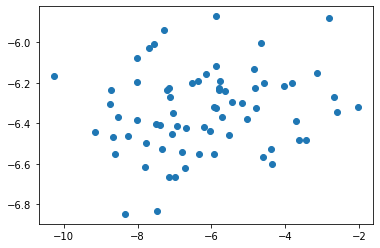

In [28]:
display(reg.coef_)
display(plt.scatter(y_test,pd.DataFrame(y_pred)))

# Linear Regression and manual coef choice

In [8]:
linreg = LinearRegression().fit(X_train, np.ravel(y_train))
importance = linreg.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %f' % (i,v))


Feature: 0, Score: 95.098927
Feature: 1, Score: -85.551855
Feature: 2, Score: 536.771044
Feature: 3, Score: 159.128289
Feature: 4, Score: -352.874161
Feature: 5, Score: 254.046924
Feature: 6, Score: -470.842500
Feature: 7, Score: -4639.341926
Feature: 8, Score: -638.567892
Feature: 9, Score: 952.443271
Feature: 10, Score: -94.519721
Feature: 11, Score: 83.467978
Feature: 12, Score: -537.236069
Feature: 13, Score: -156.178092
Feature: 14, Score: 354.813195
Feature: 15, Score: 427.654263
Feature: 16, Score: -875.024239
Feature: 17, Score: -9843.752879
Feature: 18, Score: -1447.434019
Feature: 19, Score: 2237.818296
Feature: 20, Score: 0.000000


In [29]:
y_pred_linreg = linreg.predict(X_test)

In [9]:
def predict_manual(X):
    y = pd.DataFrame()
    parameters = [0,0,0,0,0,-386.600239,-3319.088478,-537.730898,815.290956,0,0,0,0,0,0,-731.325953,-6822.235697,-1245.222403, 1885.395174,0]
    intercept = 6757.97012211905
    y['y'] = intercept + X['x1'] * parameters[0] + X['x2'] * parameters[1] + X['x3'] * parameters[2] + X['x4'] * parameters[3] + X['x5'] * parameters[4] + X['x6'] * parameters[5] + X['x7'] * parameters[6] + X['x8'] * parameters[7] + X['x9'] * parameters[8] + X['x10'] * parameters[9] + X['x11'] * parameters[10] + X['x12'] * parameters[11] + X['x13'] * parameters[12] + X['x14'] * parameters[13] + X['x15'] * parameters[14] + X['x16'] * parameters[15] + X['x17'] * parameters[16] + X['x18'] * parameters[17] + X['x19'] * parameters[18] + X['x20'] * parameters[19]
    #y['Id'] = X['Id']
    return y

In [10]:
y_pred_manual  = predict_manual(X_test)
y_pred = linreg.predict(X_test)

In [30]:
display(mean_squared_error(y_test,y_pred_linreg)**0.5)

1.8279733962633526

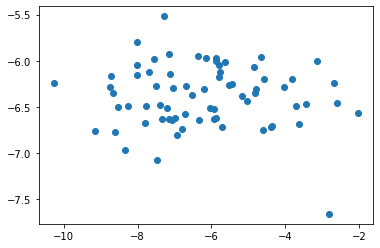

In [31]:
plt.scatter(y_test,pd.DataFrame(y_pred_linreg))

In [ ]:
sns.pairplot(X_trafo, kind='scatter')

# XGBoost

Feature: 0, Score: 0.065414
Feature: 1, Score: 0.084395
Feature: 2, Score: 0.097593
Feature: 3, Score: 0.110425
Feature: 4, Score: 0.084182
Feature: 5, Score: 0.098823
Feature: 6, Score: 0.098511
Feature: 7, Score: 0.099189
Feature: 8, Score: 0.109409
Feature: 9, Score: 0.152059
Feature: 10, Score: 0.000000
Feature: 11, Score: 0.000000
Feature: 12, Score: 0.000000
Feature: 13, Score: 0.000000
Feature: 14, Score: 0.000000
Feature: 15, Score: 0.000000
Feature: 16, Score: 0.000000
Feature: 17, Score: 0.000000
Feature: 18, Score: 0.000000
Feature: 19, Score: 0.000000
Feature: 20, Score: 0.000000


<BarContainer object of 21 artists>

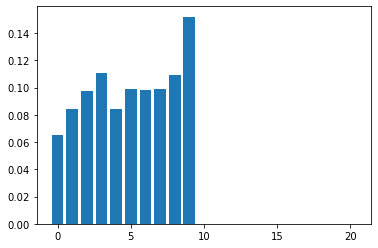

In [20]:
from xgboost import XGBRegressor
from matplotlib import pyplot

xgb = XGBRegressor()
xgb.fit(X_train, np.ravel(y_train))
importance = xgb.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)

2.094772929443848

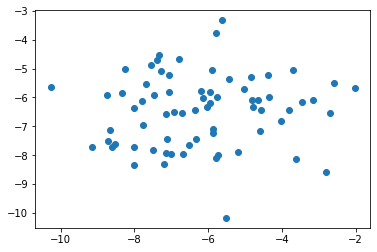

In [21]:
y_pred_xgb = xgb.predict(X_test)
display(mean_squared_error(y_test,y_pred_xgb)**0.5)
display(plt.scatter(y_test,pd.DataFrame(y_pred_xgb)))

# Decision Tree Regressor

Feature: 0, Score: 0.065505
Feature: 1, Score: 0.084330
Feature: 2, Score: 0.090857
Feature: 3, Score: 0.083899
Feature: 4, Score: 0.084788
Feature: 5, Score: 0.105299
Feature: 6, Score: 0.088361
Feature: 7, Score: 0.107560
Feature: 8, Score: 0.136868
Feature: 9, Score: 0.152532
Feature: 10, Score: 0.000000
Feature: 11, Score: 0.000000
Feature: 12, Score: 0.000000
Feature: 13, Score: 0.000000
Feature: 14, Score: 0.000000
Feature: 15, Score: 0.000000
Feature: 16, Score: 0.000000
Feature: 17, Score: 0.000000
Feature: 18, Score: 0.000000
Feature: 19, Score: 0.000000
Feature: 20, Score: 0.000000


<BarContainer object of 21 artists>

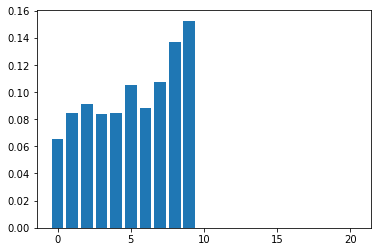

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, np.ravel(y_train))
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)

In [46]:
display(mean_squared_error(y_test,tree.predict(X_test))**0.5)

2.877376552619261

In [36]:
from sklearn.linear_model import RidgeCV

lambdas = np.linspace(0.001,10,2000)
display(lambdas)
ridge = RidgeCV(alphas=lambdas, cv=10).fit(X_train, np.ravel(y_train))
display(ridge.alpha_)
y_pred = ridge.predict(X_test)


array([1.0000000e-03, 6.0020010e-03, 1.1004002e-02, ..., 9.9899960e+00,
       9.9949980e+00, 1.0000000e+01])

7.068827413706854

In [37]:
display(mean_squared_error(y_test,y_pred)**0.5)
display(ridge.coef_)


1.7479923641492905

array([-0.10657922, -0.6040567 , -0.66666759,  0.00891813,  0.03994621,
       -0.15601536,  0.14657593,  0.13078682, -0.02164266,  0.0710057 ,
       -0.19151528, -0.53409761, -0.60609689, -0.00511213,  0.06786062,
        0.07760582, -0.07292397, -0.06514516,  0.00982012, -0.03419021,
        0.        ])

In [ ]:
pd.DataFrame(ridge.coef_).to_csv('submission.csv', index=False, header=False)